# The Central Limit Theorem and Estimation of the Mean

**Definition.** For a fixed population and fixed sample size, the collection of all possible values of the mean over all possible samples of that size, forms what we call the **sampling distribution**.

Two vital theorems govern how these sampling distributions work:

1. **Central Limit Theorem.** The means of a sampling distribution are approximately normal (bell-shaped) and centered upon $\mu_0$, the population average.
2. **Law of Large Numbers.** As n increases, our estimates based upon the sample means increase in accuracy.

Thus, the CLT guarantees a bell-shaped distribution centered upon the population average, and the Law of Large Numbers works like a lever that allows us to control the accuracy. Increased sample sizes lead to increased accuracy.

## Data Sets

We will need some data to work with:

In [1]:
united <- read.csv('http://faculty.ung.edu/rsinn/data/united.csv')
p <- read.csv('http://faculty.ung.edu/rsinn/data/personality.csv')
airports <- read.csv('http://faculty.ung.edu/rsinn/data/airports.csv')
births <-  read.csv('http://faculty.ung.edu/rsinn/data/baby.csv')

We also need for the function **sample.data.frame()** to be active in this notebook, so we copy-paste it from our [online course notes](https://straightdraw.github.io/probstat/S1c.html).

In [2]:
sample.data.frame <- function(x, size, replace = FALSE, prob = NULL, groups=NULL, 
                              orig.ids = TRUE, fixed = names(x), shuffled = c(),
                              invisibly.return = NULL, ...) {
  if( missing(size) ) size = nrow(x)
  if( is.null(invisibly.return) ) invisibly.return = size>50 
  shuffled <- intersect(shuffled, names(x))
  fixed <- setdiff(intersect(fixed, names(x)), shuffled)
  n <- nrow(x)
  ids <- 1:n
  groups <- eval( substitute(groups), x )
  newids <- sample(n, size, replace=replace, prob=prob, ...)
  origids <- ids[newids]
  result <- x[newids, , drop=FALSE]
  
  idsString <- as.character(origids)
  
  for (column in shuffled) {
    cids <- sample(newids, groups=groups[newids])
    result[,column] <- x[cids,column]
    idsString <- paste(idsString, ".", cids, sep="")
  }
  
  result <-  result[ , union(fixed,shuffled), drop=FALSE]
  if (orig.ids) result$orig.id <- idsString
  
  
  if (invisibly.return) { return(invisible(result)) } else {return(result)}
}


## Example: Estimating Narcissism

Let's work with an example from the **personality** data set: narcissism. Let's generate many, many samples of the same size. We'll find the averages from each sample and use them to estimate the average level of narcissism for students at UNG.

### First Step: Generating Samples of Size $n=10$

Let's beging with the R commands necessary to sample the **Narc** column in the *personality* data frame. We will use the

<p style="color:red;">sample.data.frame()</p>

function to draw a sample.

**Run the cell below to see how this works, and notice:**

- The function inputs:
1. Name of the data frame to sample from.
2. Sample size to be drawn.
- The output: 10 rows from the data frame with all columns present.

In [3]:
s <- sample.data.frame(p, 10, orig.ids = FALSE)
head(s,15)

,Age,Yr,Sex,G21,Corps,Res,Greek,VarsAth,Honor,GPA,...,Perf,OCD,Play,Extro,Narc,HSAF,HSSE,HSAG,HSSD,PHS
29,21,3,M,Y,N,2,N,Y,N,3.40,...,110,8,112,13,7,48,34,43,40,AG
38,19,3,M,N,Y,1,Y,Y,N,4.00,...,124,11,127,4,6,39,40,29,30,SE
104,20,2,F,N,N,1,N,N,N,3.80,...,154,7,122,2,2,51,28,13,33,AF
49,25,4,M,Y,N,3,N,N,N,2.32,...,114,6,109,3,6,50,41,30,24,AF
97,20,2,M,N,Y,1,Y,N,N,2.98,...,111,3,111,4,3,38,42,33,37,SD
123,18,1,F,N,N,1,N,N,N,4.00,...,81,5,160,10,1,55,51,33,35,SE
90,19,1,M,N,N,1,N,N,N,2.80,...,123,9,125,2,3,37,34,29,39,SD
113,22,2,F,Y,N,2,N,N,N,3.49,...,121,11,141,9,1,44,38,23,31,SD
80,19,3,F,N,N,2,Y,N,N,4.00,...,118,3,121,8,4,34,36,30,33,SD
76,21,4,F,Y,N,2,Y,N,N,3.40,...,107,7,159,9,4,54,46,25,48,SD


We can find the average narcissism for these 10 persons by subsetting our sample data frame **s**.

In [4]:
mean(s[ , 'Narc'])

[1] 3.7

**Putting it Together.** Eventually, we want to run a loop that does this a thousand or more times. Thus, we prefer a single line of code that will do it for us all at once. We wrap the *sample.data.frame()* function inside the *mean* function as shown below.

**Run the code below multiple times to see how we're sampling plus finding the average Narcissism level for each.**

In [5]:
mean(sample.data.frame(p, 10, orig.ids = F)[ , 'Narc'])

[1] 5

### Step 2: Creating a for Loop

The steps make sense if we consider them separately:

1. Create **all_means**, an initially empty vector where we plan to store our sample means.
2. Create a for loop that will a thousand times.
3. Inside the loop, we will:
  - Gather a sample of size $n=10$.
  - Calcuate the mean.
  - Add this value to the **all_means** vector.

In [6]:
all_means <- c()                                         #Empty vector to store all the sample means
for (count in 1:1000){
    sample <- sample.data.frame(p, 10, orig.ids = F)     #Generate a sample (size n=10)
    all_means[count] <- mean(sample[ , 'Narc'])          #Save the mean of this sample in my list
}

Notice that we now have a vector **all_means**, so we display the distribution in a histogram and caculate various statistics.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.900   4.100   4.600   4.665   5.200   7.600 

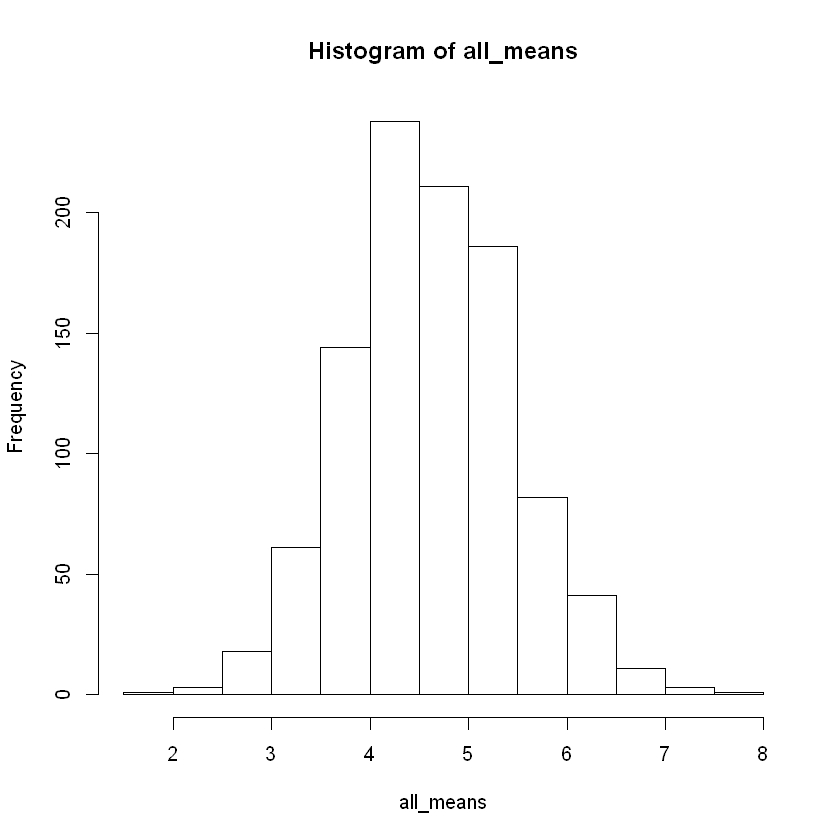

In [7]:
summary(all_means)
hist(all_means)

### Step 3: The Middle 90% of the Distribution

Because we intend to use the sampling distributions to estimate the population average, we need a way to gather an interval. This interval will be our estimated range of values. For the moment, let's use the **middle 90%** of the **all_means** vector. We will need the endpoints, e.g. the 5th and 95th percentiles from the vector.

In [8]:
lower <- quantile(all_means, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(all_means, prob = 0.95)     # Calcuate the 95th percentile.
cat('The middle 90% of the all_means vector is (',lower,',',upper,').')

The middle 90% of the all_means vector is ( 3.395 , 6.1 ).

### Step 4: The Histogram with Vertical Lines Showing the 5th and 95th Percentiles

We use the function **abline()** to superimpose vertical lines onto our histogram. We've already calculated the values for the 5th and 95th percentiles. We need only to use the option **v** which draws a *vertical line* at the value indicated. The color option is not vital for our purposes, but a splash of color is visually appealing.

As we go forward, we will see that increased sample size will lead to a narrower bell-shape. In other words, the size of the standard deviation will become important, so let's include that in the text we print out using the **cat()** function.

Standard deviation of sampling distribution: 0.8302724 
The middle 90% of the sampling distribution: is ( 3.395 , 6.1 ).

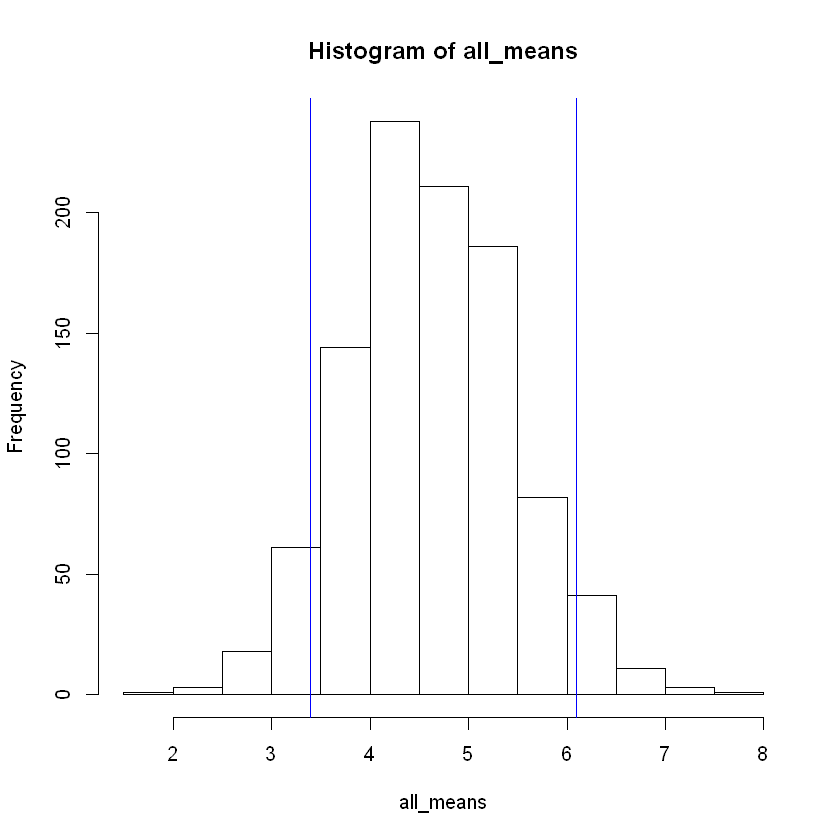

In [9]:
cat("Standard deviation of sampling distribution:", sd(all_means), '\nThe middle 90% of the sampling distribution: is (',lower,',',upper,').')
hist(all_means)
abline( v = lower, col="blue")
abline(v = upper, col="blue")

### Step 5: Performing all Tasks in 1 Code Block

Now that we have unpacked each command line needed, we can put it all together into one code block. Doing so will help to quickly generate different sampling distributions for different sample sizes **n**.

Standard deviation of sampling distribution: 0.8384352 
The middle 90% of sampling distribution: ( 3.395 , 6.005 ).

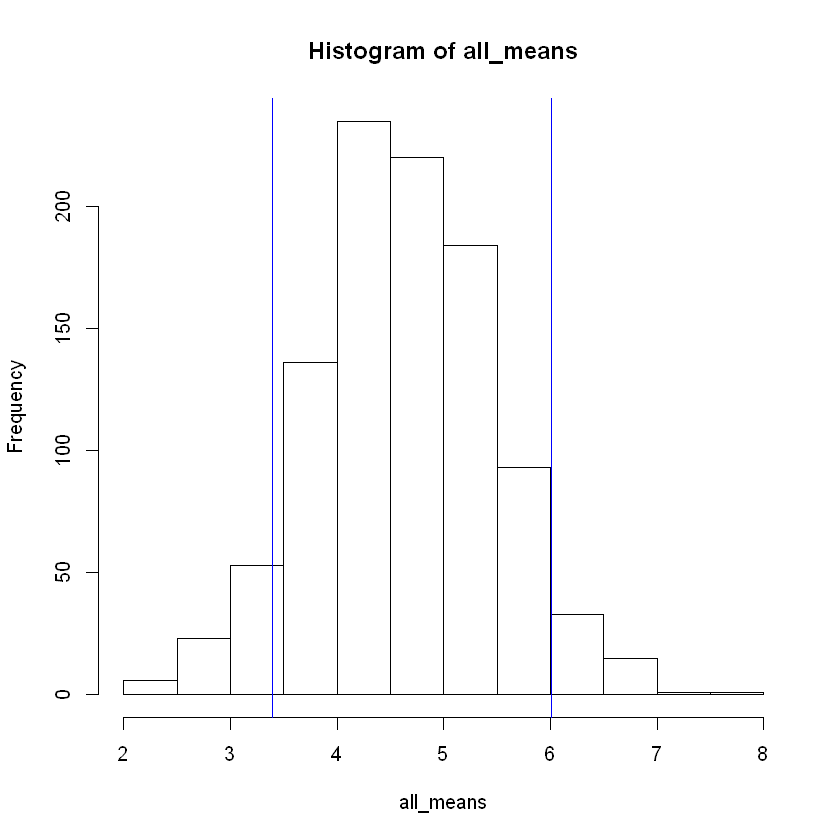

In [10]:
all_means <- c()                                           #Empty vector to store all the sample means

for (count in 1:1000){
    sample <- sample.data.frame(p, 10, orig.ids = F)       #Controls sample size
    all_means[count] <- mean(sample[ , 'Narc'])
}

upper <- quantile(all_means, prob = 0.95)
lower <- quantile(all_means, prob = 0.05)
cat("Standard deviation of sampling distribution:", sd(all_means), '\nThe middle 90% of sampling distribution: (',lower,',',upper,').')
hist(all_means)
abline( v = lower, col="blue")
abline(v = upper, col="blue")